<div style="border: 2px solid #255c8a; padding: 10px; background-color: #121212; border-radius: 5px; line-height: 1; width: 97%">
  <strong> ℹ️ Descrição:</strong> 
  Finalmente, temos provavelmente a tarefa mais complicada desta EDA: o tratamento dos dados com NaN`s
</div>

# Inicialização

**Bibliotecas**:

In [327]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Funções Auxiliares:**

In [328]:
sys.path.append(os.path.abspath("../src"))
from AnaliseExploratoria_functions import histogram_and_stats, evaluate_distribution, impute_missing_values

**Leitura do Arquivo:**

In [329]:
current_path = os.path.dirname(os.getcwd())
csv_path = (current_path + '/Data/campeonatos_futebol_sem_outliers.csv')

df = pd.read_csv(csv_path)

# Análise preliminar

Abaixo, refazemos uma análise feita em "[1] Análise Inicial", em que mostramos a % de NaNs em cada coluna:

In [330]:
nan_percent = df.isna().mean() * 100
print(nan_percent.sort_values(ascending=False))

Tratamentos 1          81.940769
Tratamentos 2          81.940769
Defesas difíceis 1     77.580020
Defesas difíceis 2     77.580020
Contra-ataques 2       77.420524
Contra-ataques 1       77.420524
Tiros-livres 2         77.398775
Tiros-livres 1         77.398775
Chutes bloqueados 2    68.071918
Chutes bloqueados 1    68.071918
Cruzamentos 1          67.462935
Cruzamentos 2          67.462935
Substituições 2        66.074600
Substituições 1        66.074600
Tiro de meta 2         56.609997
Tiro de meta 1         56.609997
Laterais 2             45.191576
Laterais 1             45.191576
Impedimentos 1          9.997463
Impedimentos 2          9.997463
Posse 1(%)              8.504006
Posse 2(%)              8.504006
Escanteios 2            8.380759
Escanteios 1            8.380759
Chutes fora 1           8.369884
Chutes fora 2           8.369884
Faltas 1                8.362635
Faltas 2                8.362635
Chutes a gol 1          5.440969
Chutes a gol 2          5.440969
Cartões am

Igualmente, mostraremos a matriz de correlação:

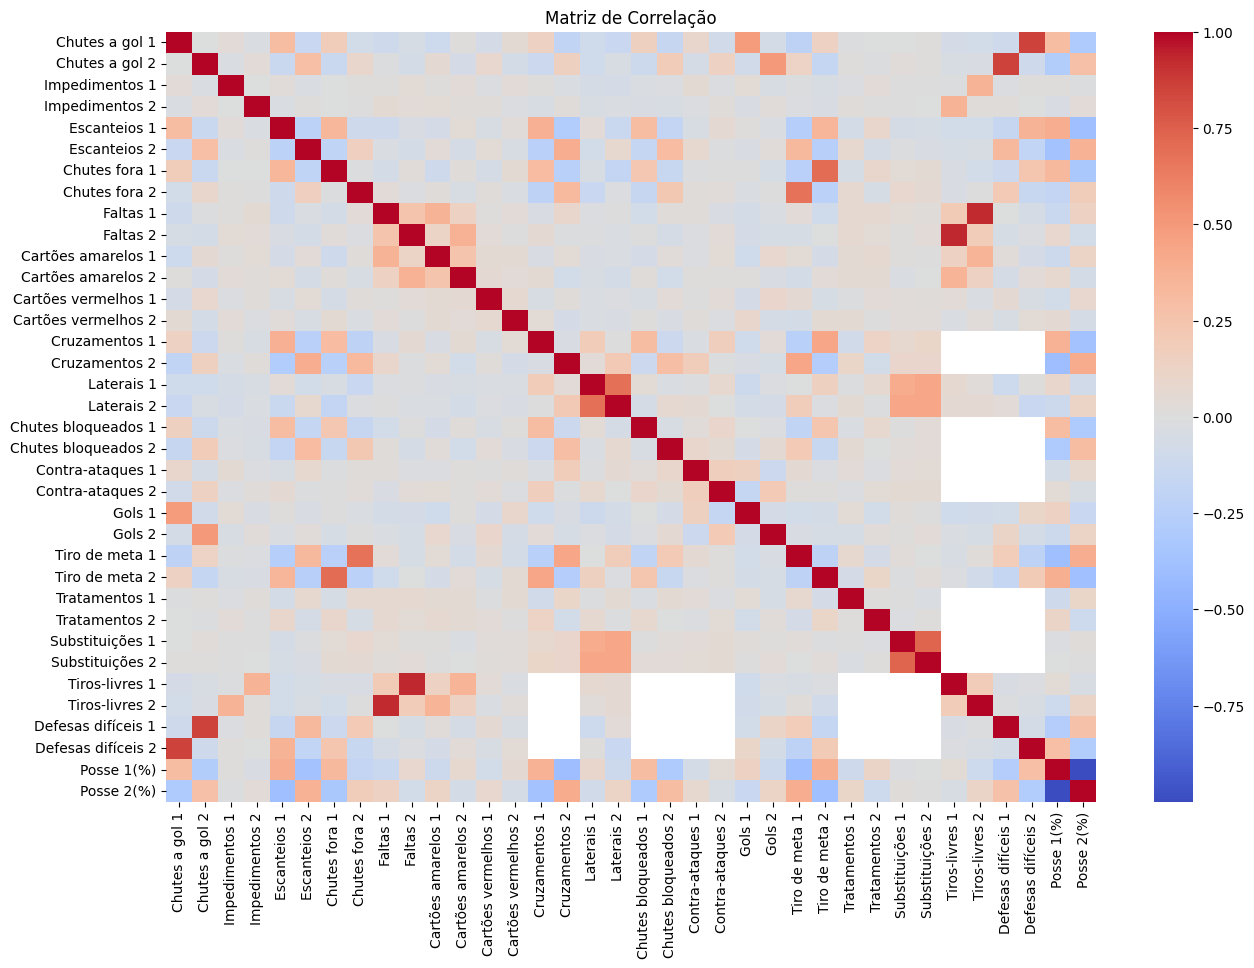

In [331]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Estratégias para lidar com os NaN

O grupo pensou emm algumas estratégias para lidarmos com os NaN. Ao final, chegamos nas seguintes ideias:

- Eliminar as colunas que possuem muitos NaN  
- Inputar, por média/mediana, ou usando o KNN Inputer, as colunas que possuem poucos NaN
- Encontrar relações entre as variáveis, de forma a reduzir a quantidade de colunas sendo usadas (crair índices)

# Retirando colunas

Como parte do tratamento de NaN, o grupo discutiu o impacto que as variáveis que possuem alto índice de dados faltantes realmente faria no modelo. 

Por exemplo, questionamos a utilidade dos dados de tratamento médico, visto que são poucas informações, e não é possível saber a seriedade da lesão, nem a importância que o jogador que necessitou de tratamento tem para o time. Assim, decidimos por eliminá-la. 

Igualmente, retiramos a coluna de defesas difíceis, visto que temos poucos dados sobre ela, além de ser difícil de descobrir o que este dado realmente representa (o quão difícil a defesa realmente foi).

Também retiramos a variável de tiros-livres, visto que esta coluna possui uma alta dependência com a quantidade de faltas feitas durante o jogo. 

Por fim, já havíamos retirado a variável com o nome dos times, por ser desprezível para o resultado final. 

In [332]:
df = df.drop('Tiros-livres 1', axis=1)
df = df.drop('Tiros-livres 2', axis=1)
df = df.drop('Tratamentos 1', axis=1)
df = df.drop('Tratamentos 2', axis=1)
df = df.drop('Defesas difíceis 1', axis=1)
df = df.drop('Defesas difíceis 2', axis=1)

Antes de seguir, faremos uma cópia do data frame, para podermos controlá-lo melhor ao decorrer das estratégias

In [333]:
df_1 = df.copy()

# Inputando valores

Para as colunas que possuem apenas poucas entradas faltando, podemos simplesmente analisar o restante do data frame, e imputar um valor padrão para elas. Neste caso, utilizaremos a média/mediana. 

Antes disso, entretanto, é interessante analisarmos a distribuição das variáveis, para checarmos se a média/mediana realmente seria uma opção válida (e ver se alguma das duas é melhor). Para isso, utilizamos três gráficos: o da distribuição, um Q-Q, e um boxplot.

> OBS: talvez o boxplot fosse mais interessante no arquivo dos outliers? Já que ele é principalmente utilizado para isso.

Faremos isso para as colunas que não possuam mais de 10% de NaN, isto é:

- Impedimentos
- Posse
- Escanteios
- Chutes fora
- Faltas
- Chutes a gol

In [334]:
colunas_avaliar = ['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
                   'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
                   'Faltas 1', 'Faltas 2', 'Posse 1(%)', 'Posse 2(%)']

**Chutes a gol**

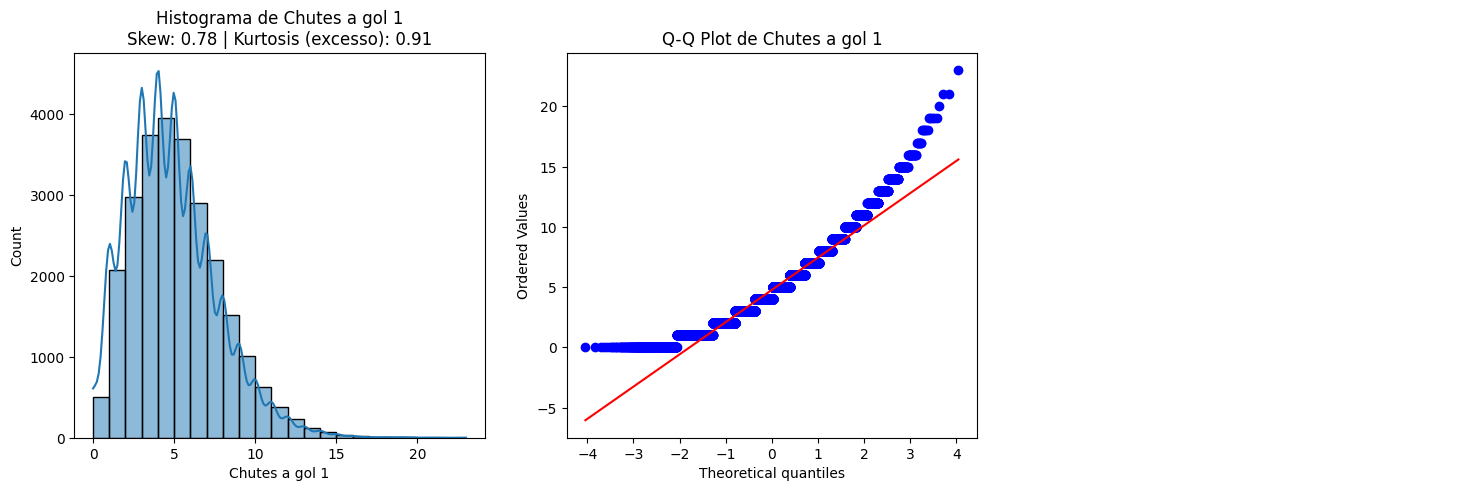


Coluna: Chutes a gol 1
Skewness: 0.784
Kurtosis (excesso): 0.905


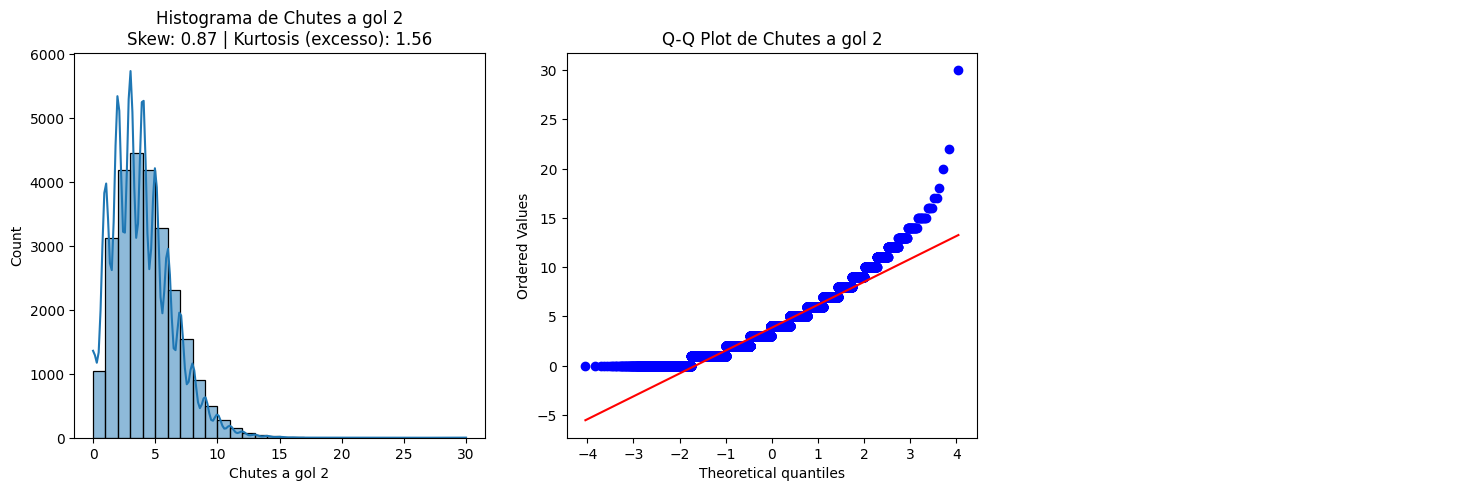


Coluna: Chutes a gol 2
Skewness: 0.870
Kurtosis (excesso): 1.557


{'skewness': np.float64(0.8697923200276007),
 'kurtosis': np.float64(1.5573508787694217)}

In [335]:
evaluate_distribution(df, colunas_avaliar[0], bins = 23)
evaluate_distribution(df, colunas_avaliar[1], bins = 30)

**Impedimentos**

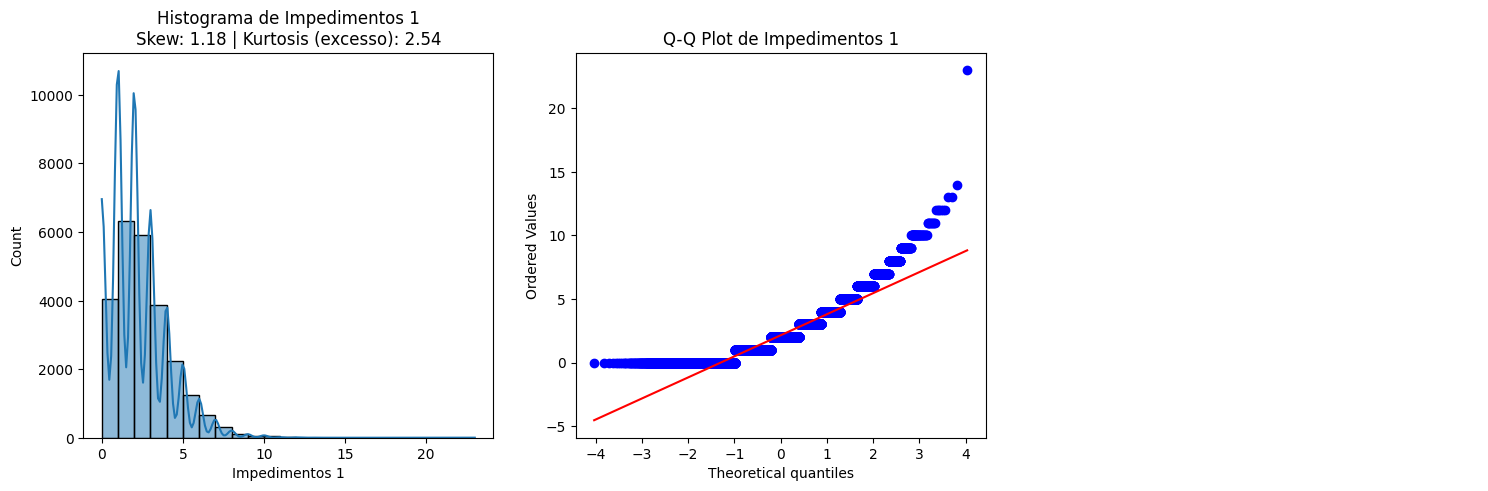


Coluna: Impedimentos 1
Skewness: 1.182
Kurtosis (excesso): 2.540


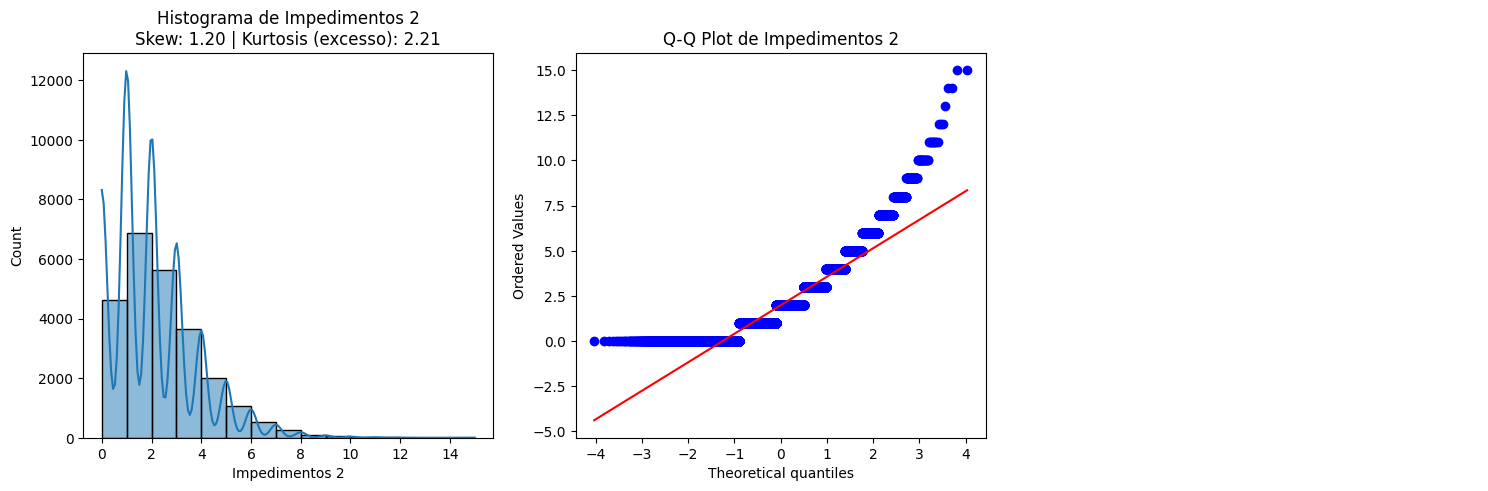


Coluna: Impedimentos 2
Skewness: 1.199
Kurtosis (excesso): 2.209


{'skewness': np.float64(1.1992227646963538),
 'kurtosis': np.float64(2.2094100297758206)}

In [336]:
evaluate_distribution(df, colunas_avaliar[2], bins = 23)
evaluate_distribution(df, colunas_avaliar[3], bins = 15)

**Escanteios**

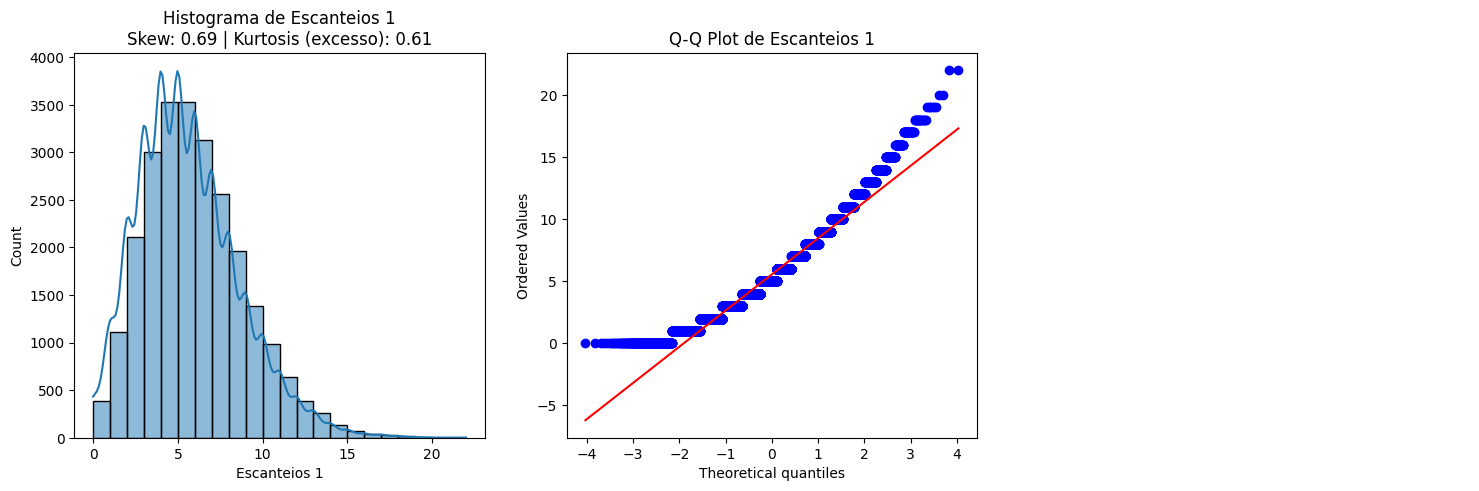


Coluna: Escanteios 1
Skewness: 0.691
Kurtosis (excesso): 0.612


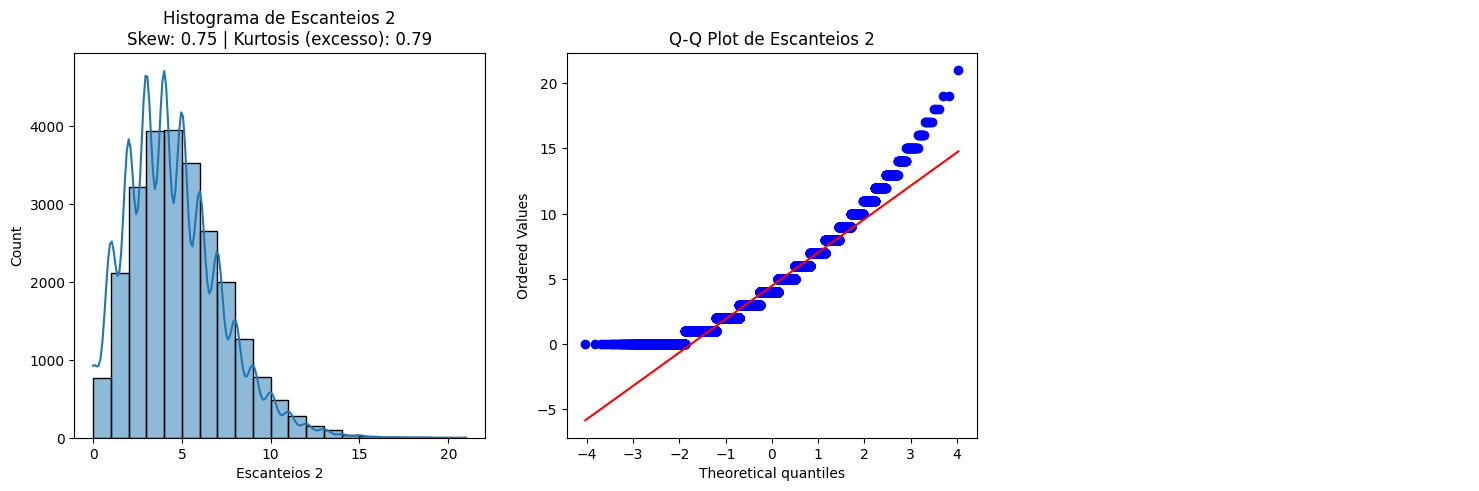


Coluna: Escanteios 2
Skewness: 0.749
Kurtosis (excesso): 0.788


{'skewness': np.float64(0.7489345352615975),
 'kurtosis': np.float64(0.7875329522538341)}

In [337]:
evaluate_distribution(df, colunas_avaliar[4], bins = 22)
evaluate_distribution(df, colunas_avaliar[5], bins = 21)

**Chutes fora**

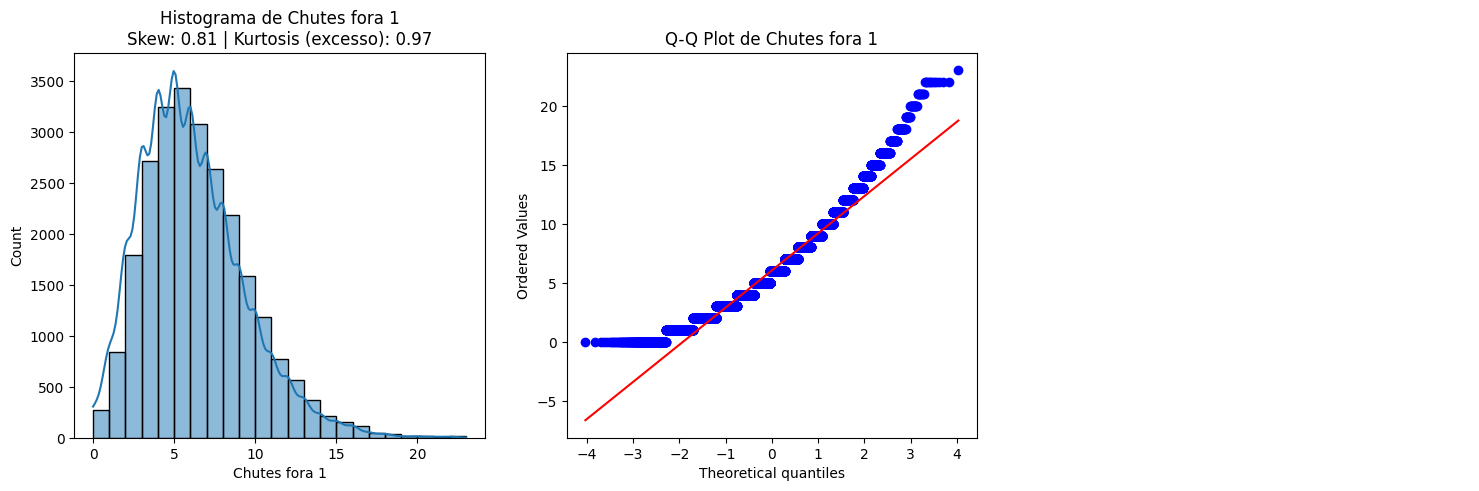


Coluna: Chutes fora 1
Skewness: 0.808
Kurtosis (excesso): 0.970


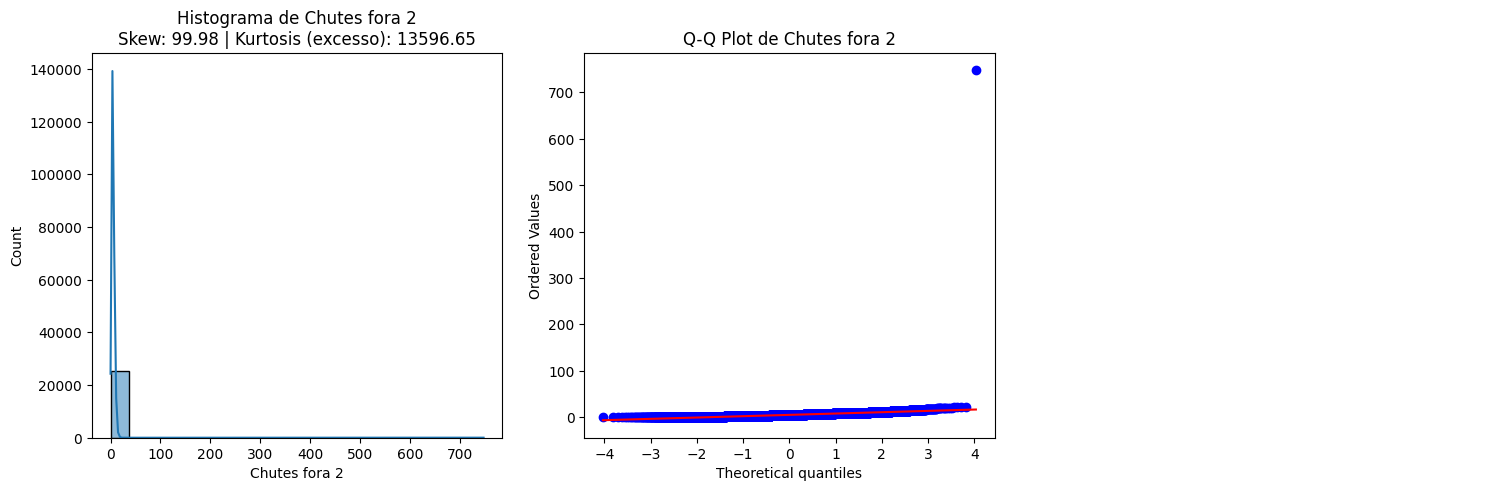


Coluna: Chutes fora 2
Skewness: 99.978
Kurtosis (excesso): 13596.651


{'skewness': np.float64(99.97823790224088),
 'kurtosis': np.float64(13596.651410603896)}

In [338]:
evaluate_distribution(df, colunas_avaliar[6], bins = 23)
evaluate_distribution(df, colunas_avaliar[7], bins = 20)

**Faltas**

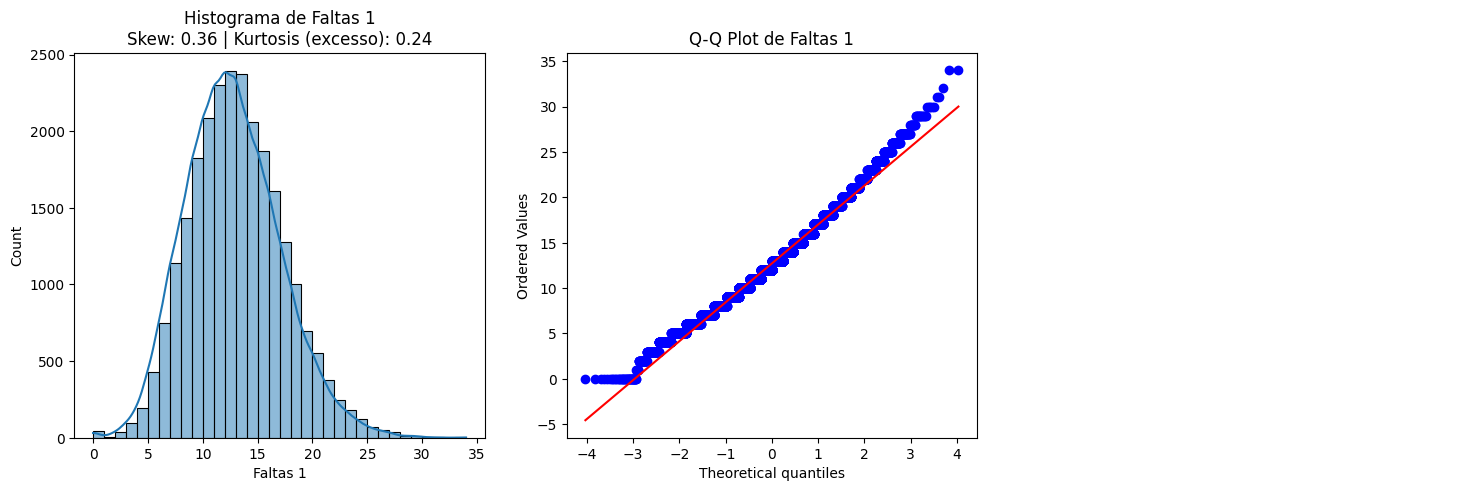


Coluna: Faltas 1
Skewness: 0.359
Kurtosis (excesso): 0.242


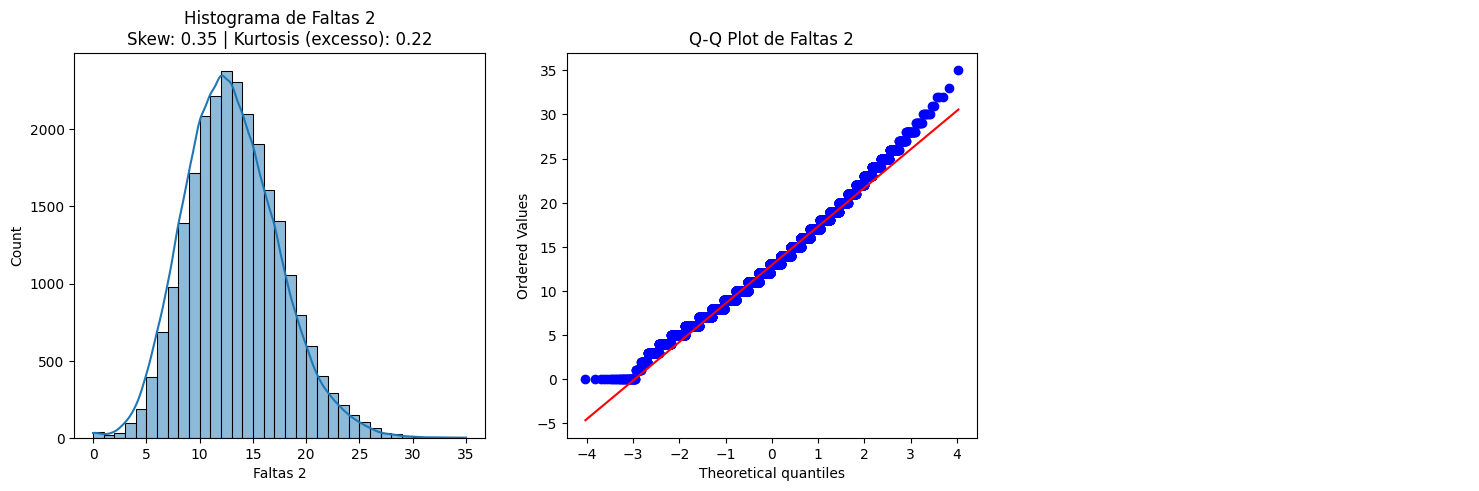


Coluna: Faltas 2
Skewness: 0.346
Kurtosis (excesso): 0.224


{'skewness': np.float64(0.3464990275125146),
 'kurtosis': np.float64(0.22389342557557246)}

In [339]:
evaluate_distribution(df, colunas_avaliar[8], bins = 34)
evaluate_distribution(df, colunas_avaliar[9], bins = 35)

**Posse de bola**

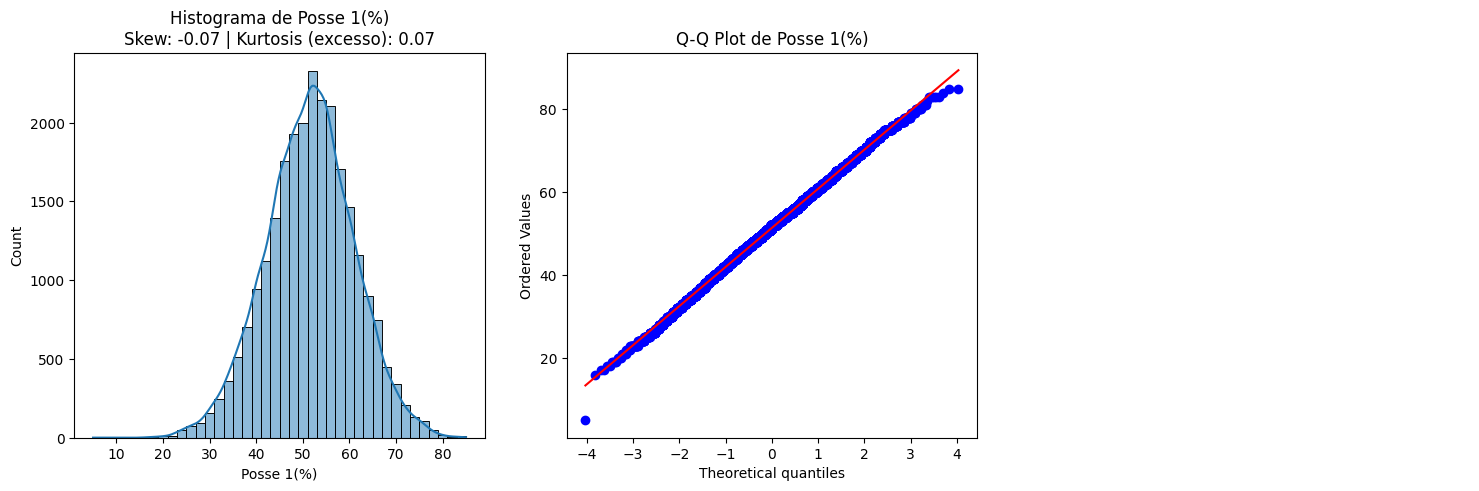


Coluna: Posse 1(%)
Skewness: -0.071
Kurtosis (excesso): 0.070


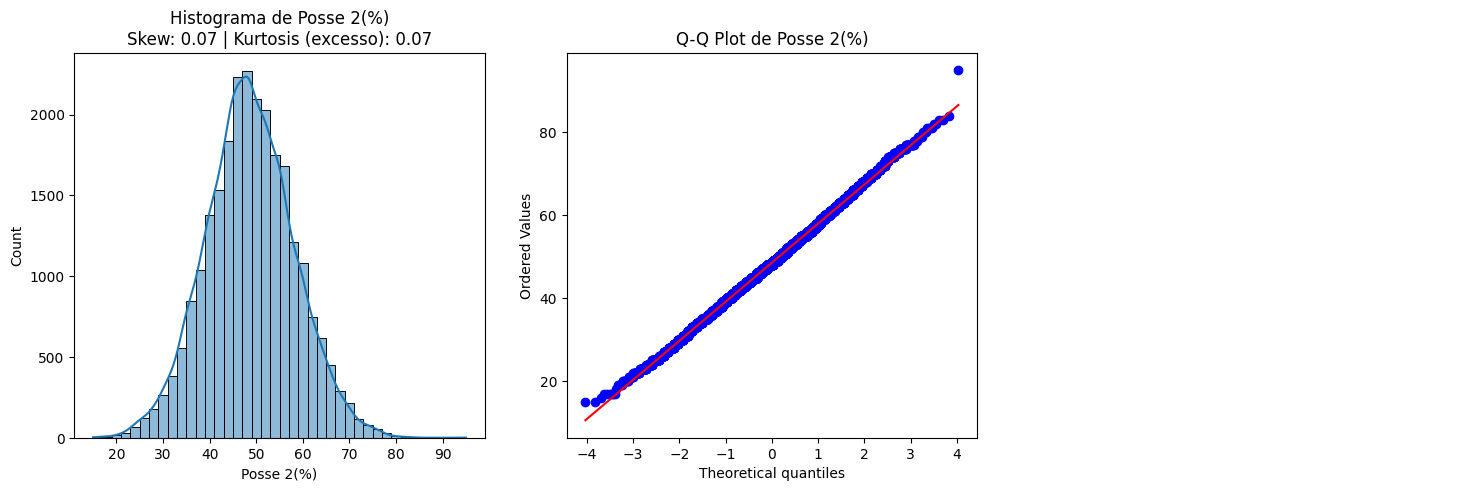


Coluna: Posse 2(%)
Skewness: 0.071
Kurtosis (excesso): 0.071


{'skewness': np.float64(0.07096992007983775),
 'kurtosis': np.float64(0.07050855292312841)}

In [340]:
evaluate_distribution(df, colunas_avaliar[10])
evaluate_distribution(df, colunas_avaliar[11])

TODO: analisar os gráficos acima, e substituir pela média/mediana quando aplicável; eliminar demais colunas; 

# Ideia 1: Eliminar colunas com muitos NaN

Como uma estratégia bastante simples, podemos eliminar as colunas que possuem muitos NaN. Afinal de contas, temos pouquíssimos dados para podermos inferir uma média ou padrão a partir deles, então é extremamente difícil conseguir utilizá-los na prática.

As colunas que serão eliminadas são aquelas que possuem mais de 40% de NaN na análise preliminar, e ainda não foram excluídos:

- Contra-ataques
- Chutes bloqueados
- Cruzamentos
- Substituições
- Tiro de meta
- Laterais

In [341]:
df_1 = df_1.drop('Contra-ataques 1', axis=1)
df_1 = df_1.drop('Contra-ataques 2', axis=1)
df_1 = df_1.drop('Chutes bloqueados 1', axis=1)
df_1 = df_1.drop('Chutes bloqueados 2', axis=1)
df_1 = df_1.drop('Cruzamentos 1', axis=1)
df_1 = df_1.drop('Cruzamentos 2', axis=1)
df_1 = df_1.drop('Substituições 1', axis=1)
df_1 = df_1.drop('Substituições 2', axis=1)
df_1 = df_1.drop('Tiro de meta 1', axis=1)
df_1 = df_1.drop('Tiro de meta 2', axis=1)
df_1 = df_1.drop('Laterais 1', axis=1)
df_1 = df_1.drop('Laterais 2', axis=1)

TODO: salvar isso em um csv separado

# Ideia 2: Criar Índices